# Coronavirus 
___
Coronavirus COVID-19 (2019-nCoV)  
COVID-19 Data for South Africa
### About Notebook
The goal here is to explore data for Coronavirus spread in South Africa, this notebook will be updated as time goes, Site to know more about Coronavirus https://www.who.int/health-topics/coronavirus

___
### Load Packages
Let's load packages that we need to achieve the goal above

In [1]:
import os
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime
from textwrap import wrap
### NOTE: `conda install basemap`
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.max_colwidth = 100

### Data 
___
Let's check the data, we may have multiple files in the data directory 

In [2]:
os.listdir('../data')

['.~lock.covid19za_timeline_confirmed.csv#',
 'LICENSE.md',
 'covid19za_timeline_confirmed.csv',
 'covid19za_timeline_transmission_type.csv',
 'covid19za_timeline_deaths.csv',
 'health_system_za_public_hospitals.csv',
 'README.md',
 'health_system_za_public_hospitals_contacts.csv',
 'health_system_za_public_hospitals_extended_details.csv',
 '.~lock.health_system_za_public_hospitals_extended_details.csv#',
 '.~lock.health_system_za_public_hospitals.csv#',
 '.~lock.health_system_za_public_hospitals_contacts.csv#',
 'covid19za_timeline_testing.csv',
 '.~lock.covid19za_timeline_transmission_type.csv#']

We have one CSV file that the data, let's use this data

### Load data
___
Let's load data 

In [3]:
df = pd.read_csv('../data/covid19za_timeline_confirmed.csv')

### Partial View of Data
___
Let's see how the data is formatted

In [4]:
df.head()

,case_id,date,YYYYMMDD,country,province,geo_subdivision,age,gender,transmission_type
0,1,05-03-2020,20200305,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy
1,2,07-03-2020,20200307,South Africa,GP,ZA-GP,39.0,female,Travelled to Italy
2,3,08-03-2020,20200308,South Africa,KZN,ZA-KZN,NaN,female,Travelled to Italy
3,4,09-03-2020,20200309,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy
4,5,09-03-2020,20200309,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy


### Conversion 
___
Let's convert data to the correct data type, we will only convert `date` at the moment, Age has missing values so that cannot be converted at the moment 

In [5]:
df['date'] = df.apply(lambda x: datetime.strptime(x['date'], '%d-%m-%Y').date(), axis=1)

### Age Group
___
Let's create age group column to use it for further analysis

In [6]:
bins = [17, 18, 30, 40, 50, 60, 70, 80]
labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['age_group'] = pd.cut(df.age, bins, labels = labels, include_lowest = True)

### Visualizations
___
Graphs are better to use and explain, let's viusalize our data

In [7]:
df.head()

,case_id,date,YYYYMMDD,country,province,geo_subdivision,age,gender,transmission_type,age_group
0,1,2020-03-05,20200305,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,30-39
1,2,2020-03-07,20200307,South Africa,GP,ZA-GP,39.0,female,Travelled to Italy,30-39
2,3,2020-03-08,20200308,South Africa,KZN,ZA-KZN,NaN,female,Travelled to Italy,NaN
3,4,2020-03-09,20200309,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,30-39
4,5,2020-03-09,20200309,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy,30-39


In [8]:
df.gender.value_counts()

male      44
female    18
Name: gender, dtype: int64

In [9]:
def vertical_bar_chart(df, x, y, label, sort, figsize=(13, 9), ascending=True):
    """
    This customize vertical bar chart from seaborn(sns as aliased above) 
    Args:
        df: dataframe 
        x: x-axis column 
        y: y-axis column
        label: string to label the graph
        figsize: figure size to make chart small or big
        ascending: ascending order from smallest to biggest
        sort: which column to sort by 
        
    Returns:
        None
    """
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=figsize)
    #sns.set_color_codes(sns.color_palette(["#0088c0"]))
    # Text on the top of each barplot
    ax = sns.barplot(x=x, y=y, data=df.sort_values(sort, ascending=ascending),
            label=label, color="b", palette=["#0088c0"])
    
    total = df[y].sum()
    for p in ax.patches:
        ax.annotate(str(format(p.get_height()/total * 100, '.2f')) + '%' + ' (' + str(int(p.get_height())) + ')', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), textcoords = 'offset points')
    
    y_value=['{:,.0f}'.format(x/total * 100) + '%' for x in ax.get_yticks()]
    plt.yticks(list(plt.yticks()[0]) + [10])
    ax.set_yticklabels(y_value)
    plt.xlabel('')
    plt.ylabel('')
    sns.despine(left=True, bottom=True)
    
def horizontal_bar_chart(df, x, y, label, figsize=(16, 16)):
    """
    This customize horizontal bar chart from seaborn(sns as aliased above) 
    Args:
        df: dataframe 
        x: x-axis column 
        y: y-axis column
        label: string to label the graph
        figsize: figure size to make chart small or big
        
    Returns:
        None
    """
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(x=x, y=y, data=df,
            label=label, color="b", palette=["#0088c0"])
    total = df.values[:, 1].sum()
    for i, v in enumerate(df.values[:, 1]):
        ax.text(v + 0.1, i + .25, str(format(v / total * 100, '.2f')) + '% (' + str(v) + ')')
        
    labels = [ '\n'.join(wrap(l, 20)) for l in df.values[:, 0]]
    ax.set_yticklabels(labels)
    x_value=['{:,.0f}'.format(x/total * 100) + '%' for x in ax.get_xticks()]
    plt.xticks(list(plt.xticks()[0]) + [10])
    ax.set_xticklabels(x_value)
    plt.ylabel('')
    plt.xlabel('')
    sns.despine(left=True, bottom=True)
    
def line_graph(df, column, figsize=(12, 8)):
    """
    This customize line chart from matplotlib(plt as aliased above) 
    Args:
        df: dataframe 
        column: x-axis column
        label: string to label the graph
        figsize: figure size to make chart small or big
        
    Returns:
        None
    """
    fig, ax = plt.subplots(figsize=figsize)
    line_data = df[column].value_counts().reset_index().sort_values(by='index')
    line_data.plot(x='index', y=column, style='o-', ax=ax)
    plt.xlabel('')
    

def pie_chart(df, column):
    """
    This customize pie chart from matplotlib(plt as aliased above) 
    Args:
        df: dataframe 
        column: x-axis column
        label: string to label the graph
        figsize: figure size to make chart small or big
        
    Returns:
        None
    """
    X = df[column].value_counts()
    colors = ['#0088C0', '#82DAFF']
    plt.pie(X.values, labels=X.index, colors=colors,
            startangle=90,
            explode = (0, 0),
            textprops={'fontsize': 14},
            autopct = '%1.2f%%')
    plt.axis('equal')
    plt.show()

___
### Age group 
Let's see age groups that infected by Coronavirus

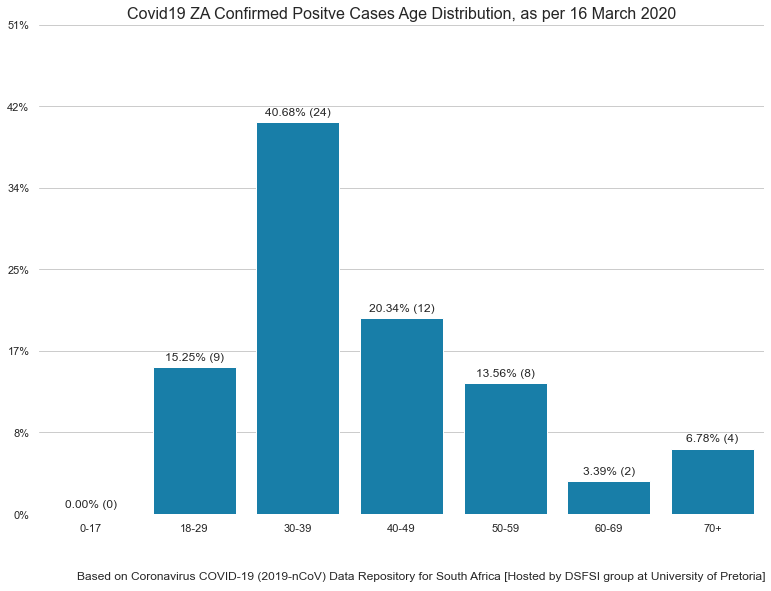

In [10]:
vertical_bar_chart(df['age_group'].value_counts().reset_index(), 'index', 'age_group', 'Age distribution', 'index')
plt.title("Covid19 ZA Confirmed Positve Cases Age Distribution, as per 16 March 2020", fontsize=16)
plt.annotate('Based on Coronavirus COVID-19 (2019-nCoV) Data Repository for South Africa [Hosted by DSFSI group at University of Pretoria]', 
             (0.1, 0.02), xycoords='figure fraction', fontsize=12)
plt.savefig("../visualisation/age_distribution_confirmed_cases.png", 
#                bbox_inches='tight', 
               transparent=True,
               pad_inches=0, dpi = 200)

#### Coronavirus infection
The Age group that is mostly infected is between **30 - 39**, note that from between age of **30 - 59** it is about **~83%** infected

___
### Daily infections
Let's See how the virus is spreading by day

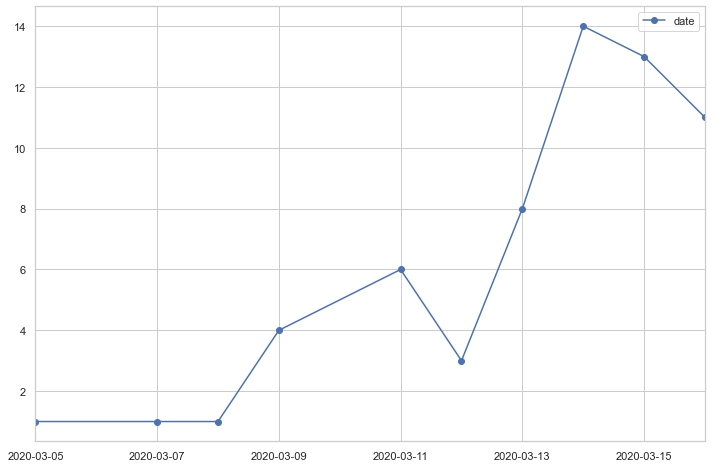

In [11]:
line_graph(df, 'date')

### Gender
Let's see which gender has more 

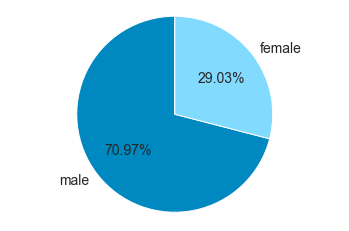

In [12]:
pie_chart(df, 'gender')

**60%** of infected individuals are Males and **40%** are Females
___

### Province 
Lets see provinces that are affected by Coronavirus

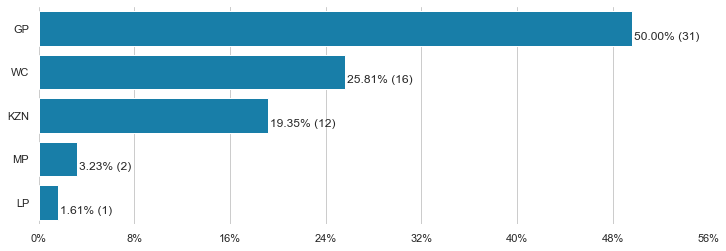

In [13]:
horizontal_bar_chart(df['province'].value_counts().reset_index(), 'province', 'index', 'Province', figsize=(12, 4))

**Gauteng** is leading in terms of reported cases, that makes sense since lot of people are using OR Tambo International Airpot
___

### Country 
Let's see which country they travel for before coming to South Africa

In [14]:
df['transmission_type'] = df['transmission_type'].apply(lambda x: 
                              x.replace('Travelled to ', '')\
                              .replace(' and', ';')\
                              .replace('Visiting resident of ', '')\
                              .replace(' travelled to', ';'))

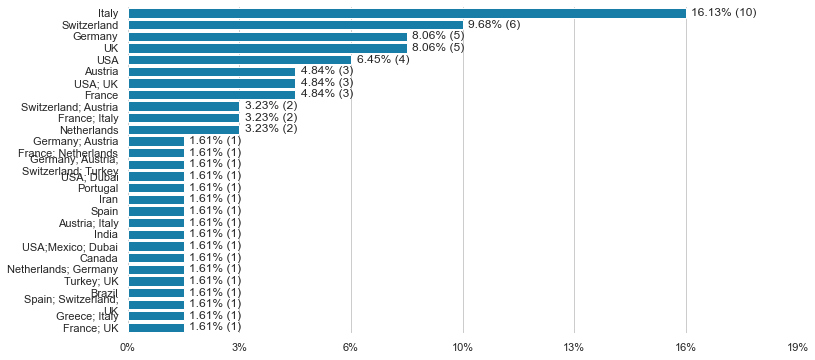

In [15]:
horizontal_bar_chart(df['transmission_type'].value_counts().reset_index(), 'transmission_type', 
                     'index', 'Country', figsize=(12, 6))

### Note
Lot of people seems like they got infected by a virus in Itali, It seems like they pass through Italy first  and there is also lot of interactions happens in Itali and Austria
___

## Netwok for pathways
Lets plot the network path for their trips(In Progress)

In [16]:
### Hardcoded For now to simulate use of maps
#### COUNTRIES ####
countries = {'Italy':[41.8719, 12.5674], 'Germany':[51.1657, 10.4515],  
  'Austria':[47.5162, 14.5501], 'Portugal':[39.3999, 8.2245], 'Switzerland':[46.8182, 8.2275], 
  'Turkey':[38.9637, 35.2433], 'UK':[55.3781, 3.4360], 
  'USA':[37.0902, 95.7129], 'Greece':[39.0742, 21.8243]}
#### Provinces in South Africa ####
province = {'KZN':[28.5306, 30.8958], 'GP':[26.2708, 28.1123], 'WC':[33.2278, 21.8569], 'MP':[25.5653, 30.5279]}

In [17]:
for index, row in df.iterrows():
    if ';' in row['transmission_type']:
        print(row['transmission_type'].split('; '), '->', row['province'])
    else:
        print(row['transmission_type'],'->', row['province'])

Italy -> KZN
Italy -> GP
Italy -> KZN
Italy -> KZN
Italy -> KZN
Italy -> KZN
Italy -> KZN
Italy -> GP
Germany -> GP
Germany -> GP
['Austria', 'Italy'] -> GP
Portugal -> KZN
['Germany', 'Austria', 'Switzerland', 'Turkey'] -> WC
['Turkey', 'UK'] -> KZN
USA -> MP
USA -> GP
['Switzerland', 'Austria'] -> GP
Austria -> GP
Italy -> GP
Switzerland -> GP
['Greece', 'Italy'] -> KZN
Switzerland -> KZN
['Switzerland', 'Austria'] -> WC
Italy -> WC
['USA', 'UK'] -> GP
['USA', 'UK'] -> GP
['USA', 'UK'] -> GP
Germany -> GP
['Netherlands', 'Germany'] -> GP
Netherlands -> GP
['France', 'Italy'] -> GP
Brazil -> WC
France -> WC
['France', 'Italy'] -> WC
['USA', 'Dubai'] -> WC
UK -> WC
UK -> WC
Switzerland -> KZN
Iran -> GP
UK -> GP
Switzerland -> GP
UK -> GP
Germany -> GP
Germany -> GP
Switzerland -> GP
['Germany', 'Austria'] -> WC
['Spain', 'Switzerland', 'UK'] -> WC
Netherlands -> WC
Switzerland -> WC
Austria -> WC
UK -> KZN
['France', 'Netherlands'] -> LP
Canada -> WC
France -> WC
Spain -> GP
Austria -

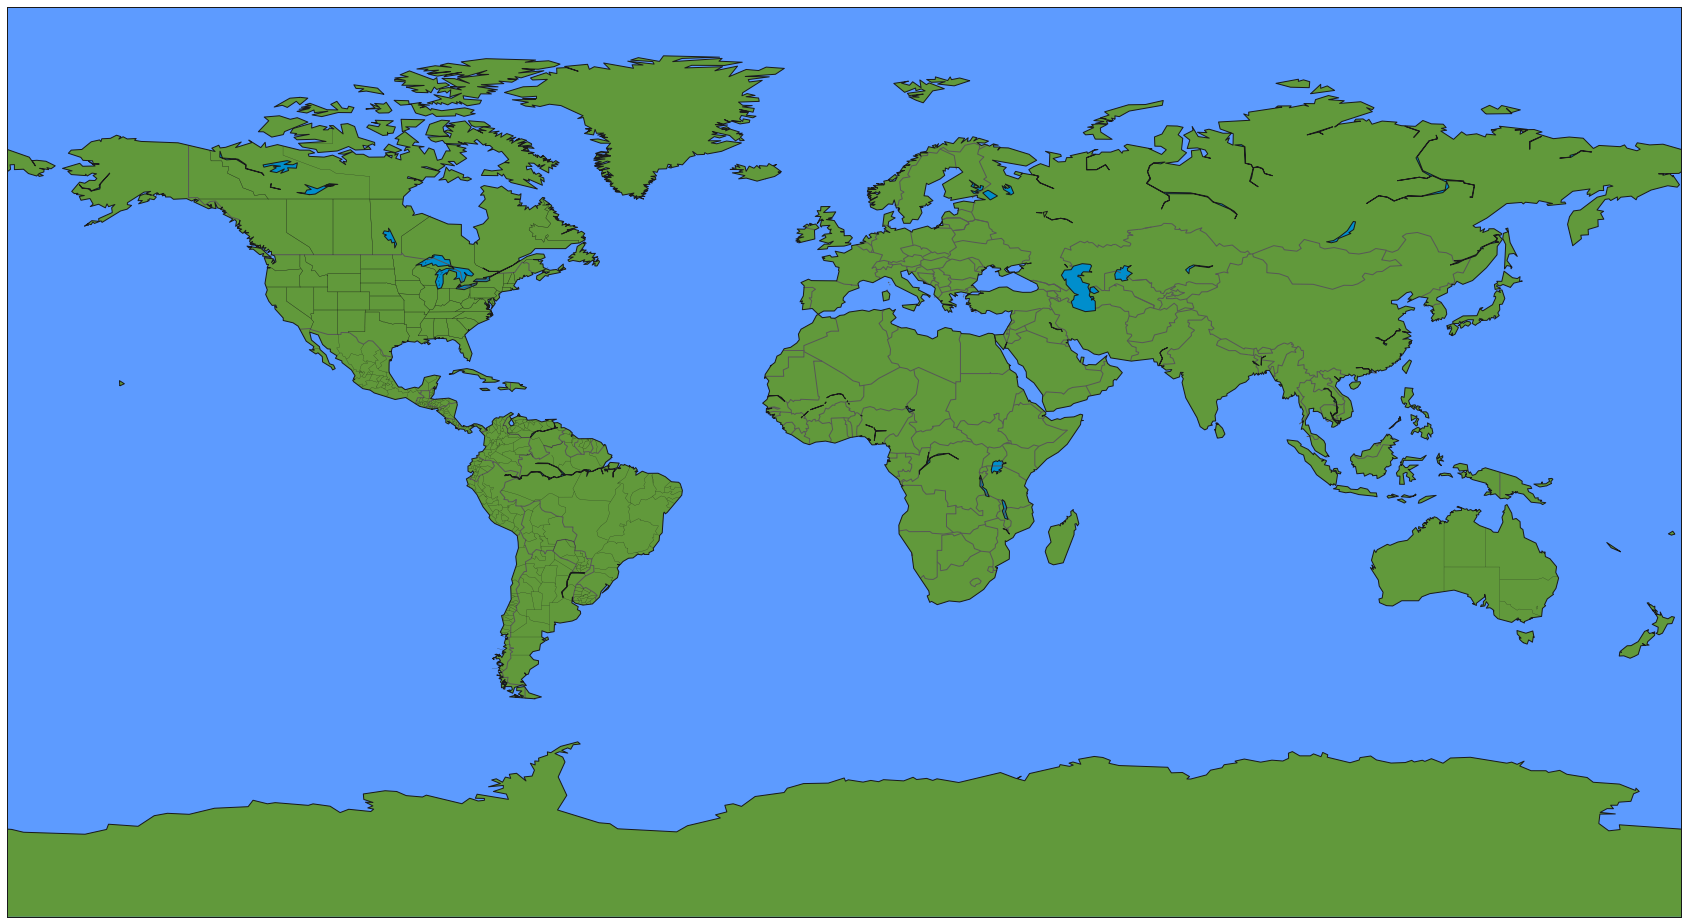

In [18]:
plt.figure(figsize = (30,30))
m = Basemap(projection='gall')
m.fillcontinents(color="#61993b",lake_color="#008ECC")
m.drawmapboundary(fill_color="#5D9BFF")
m.drawcountries(color='#585858',linewidth = 1)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=1)
plt.show()